### Libraries

In [1]:
#data manipulation 
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

# data visualization
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as ex
import matplotlib

# data preprocessing
from sklearn.model_selection import train_test_split

#model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


#default theme
import warnings
matplotlib.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')
# plt.style.use('ggplot')


C:\Users\M R Mafi\AppData\Roaming\Python\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.stats import gaussian_kde


### load data and it's basic insight

In [2]:
#get dataset names
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [79]:
df = sns.load_dataset('iris')
df.head(51)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

A balanced, non-null ready clear data set

### EDA

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

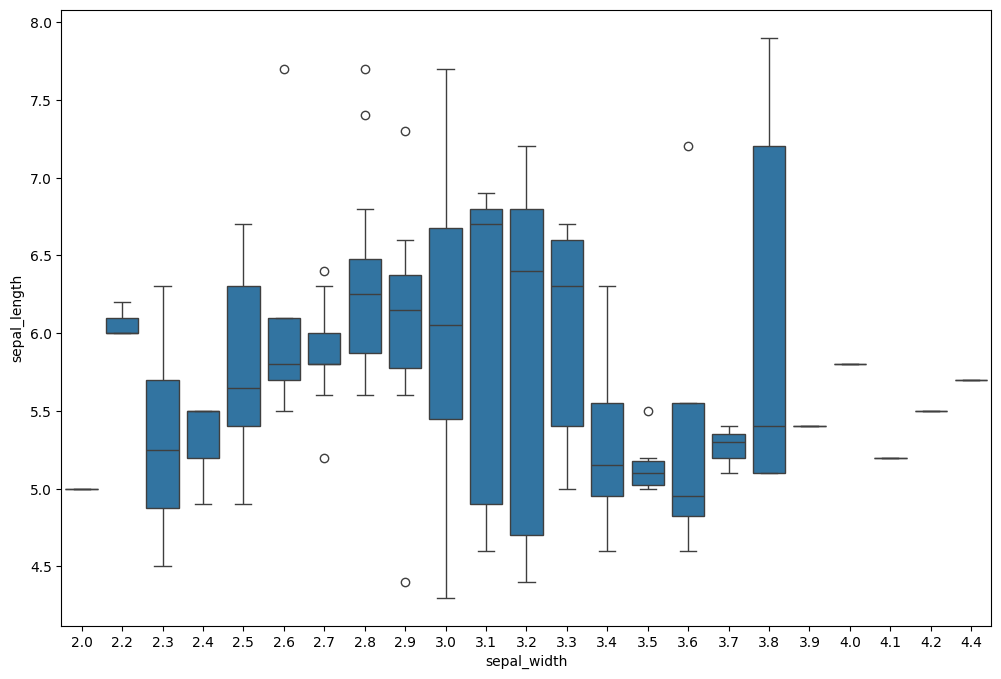

In [9]:
# outlier 
sns.boxplot(x='sepal_width', y = 'sepal_length',  data=df)

<Axes: xlabel='petal_width', ylabel='petal_length'>

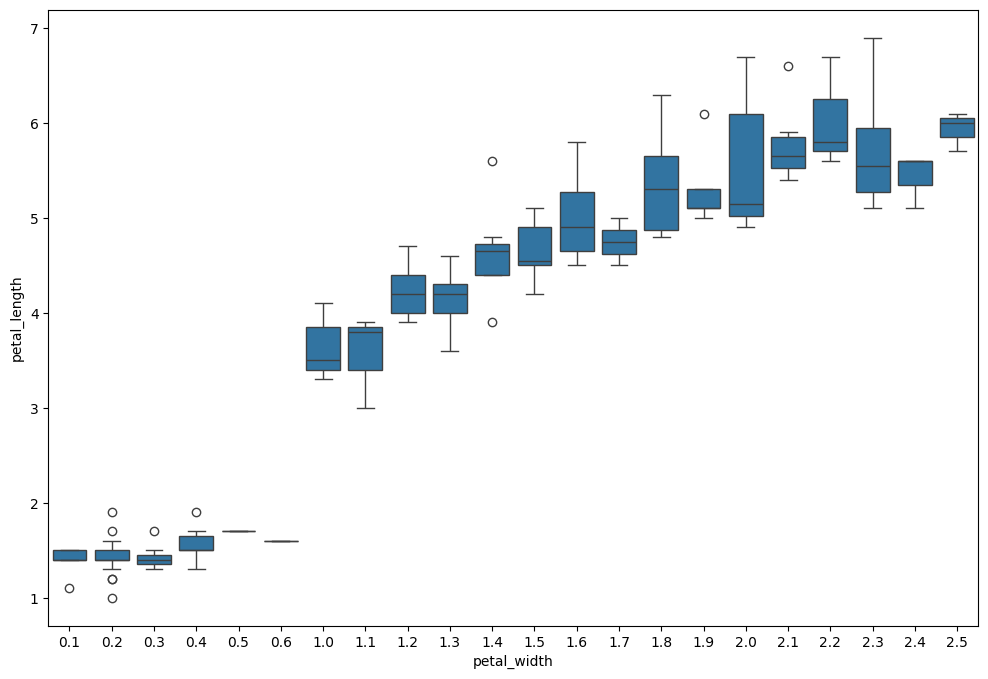

In [10]:
sns.boxplot(x='petal_width', y = 'petal_length',  data=df)

In [11]:
# #for individual column
# # details the outlier
# def outlier(df, col):
#     Q1 = df[col].quantile(.25)
#     Q3 = df[col].quantile(.75)
#     IQR = Q3 -Q1
#     up_whis = Q3 + (1.5*IQR) 
#     low_whis = Q1 - (1.5*IQR) 
#     return df[(df[col] >= low_whis) & (df[col] <= up_whis)]

In [12]:
# df = outlier(df,"petal_width")
# df = outlier(df,"petal_length")
# df = outlier(df,"sepal_width")
# df = outlier(df,"sepal_length")

<Axes: xlabel='petal_length'>

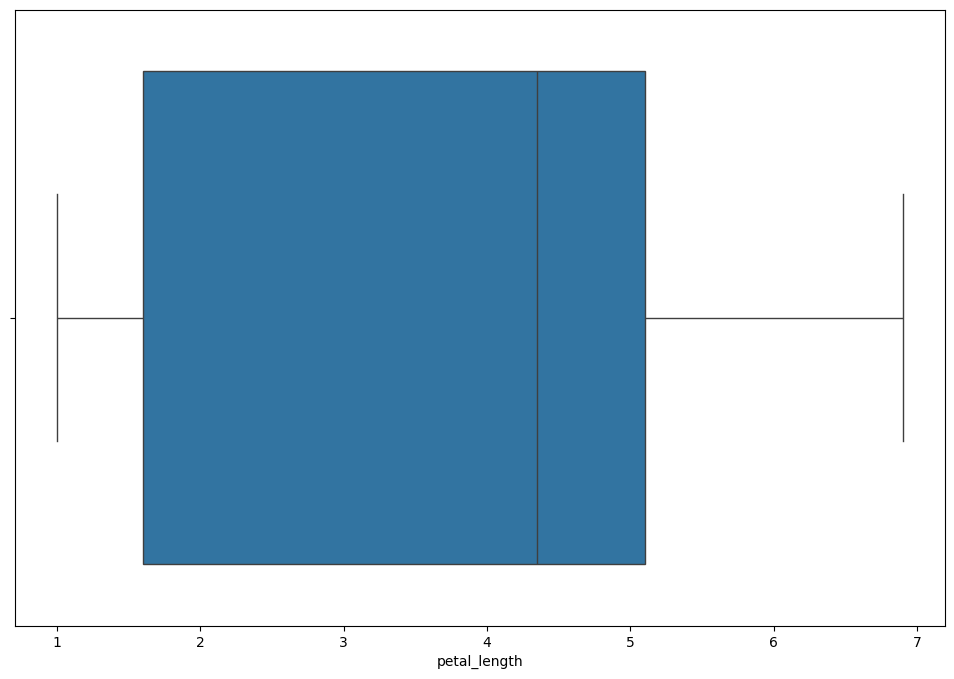

In [13]:
sns.boxplot( x = 'petal_length',  data=df)

<Axes: xlabel='petal_width'>

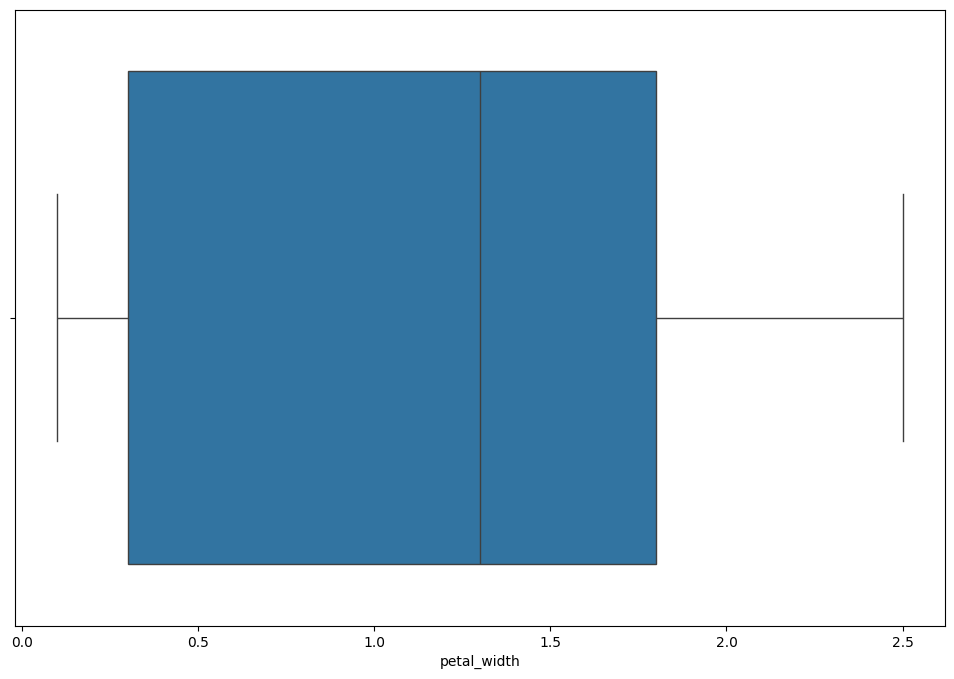

In [14]:
sns.boxplot( x = 'petal_width',  data=df)

<Axes: ylabel='sepal_length'>

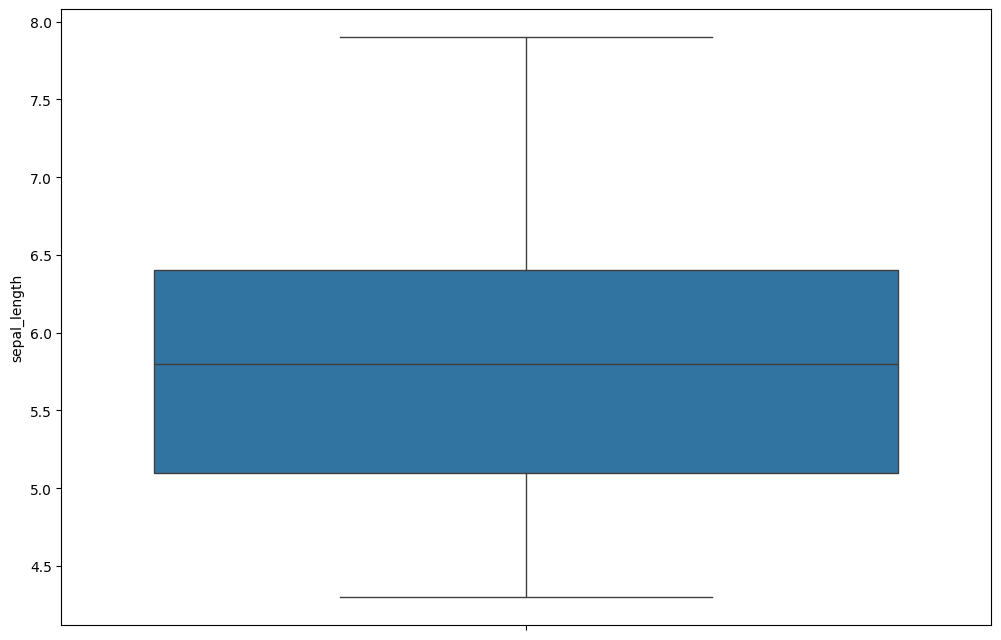

In [15]:
sns.boxplot( y = 'sepal_length',  data=df)

<Axes: ylabel='petal_width'>

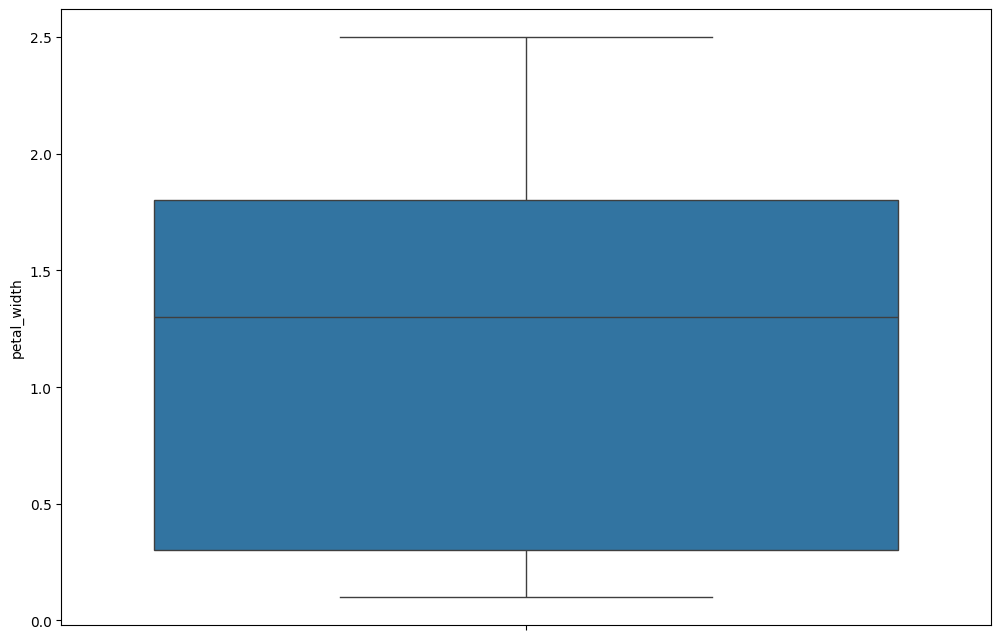

In [16]:
sns.boxplot( y = 'petal_width',  data=df)

** # Why This Happens

Outliers are contextual: what is an outlier in a small group might not be one in the whole dataset.

Using x for grouping creates local statistics, which can reveal hidden outliers.

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

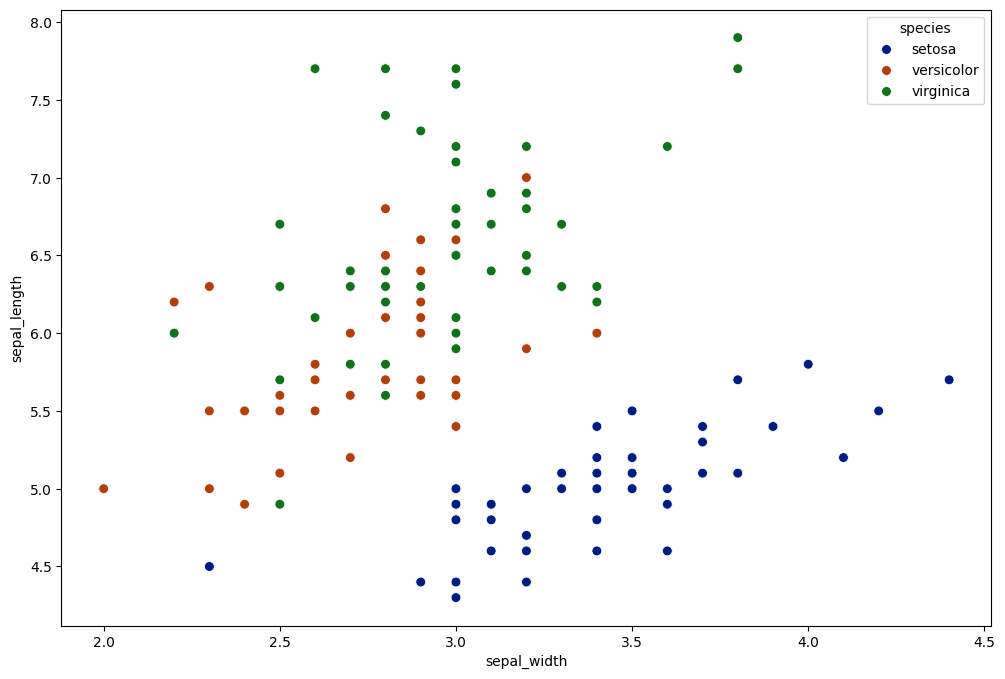

In [17]:
# scatter plot

sns.scatterplot( y = 'sepal_length', x = 'sepal_width', hue='species', s= 50, palette="dark" ,data=df)

<Axes: xlabel='petal_width', ylabel='petal_length'>

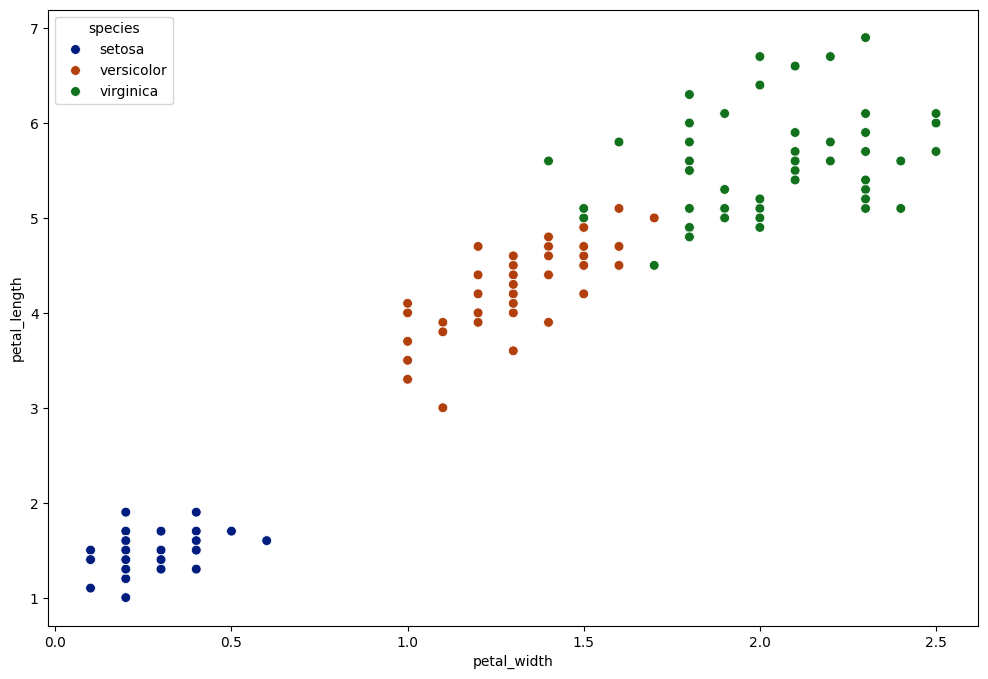

In [18]:
sns.scatterplot( y = 'petal_length', x = 'petal_width', hue='species', s= 50, palette="dark" ,data=df)

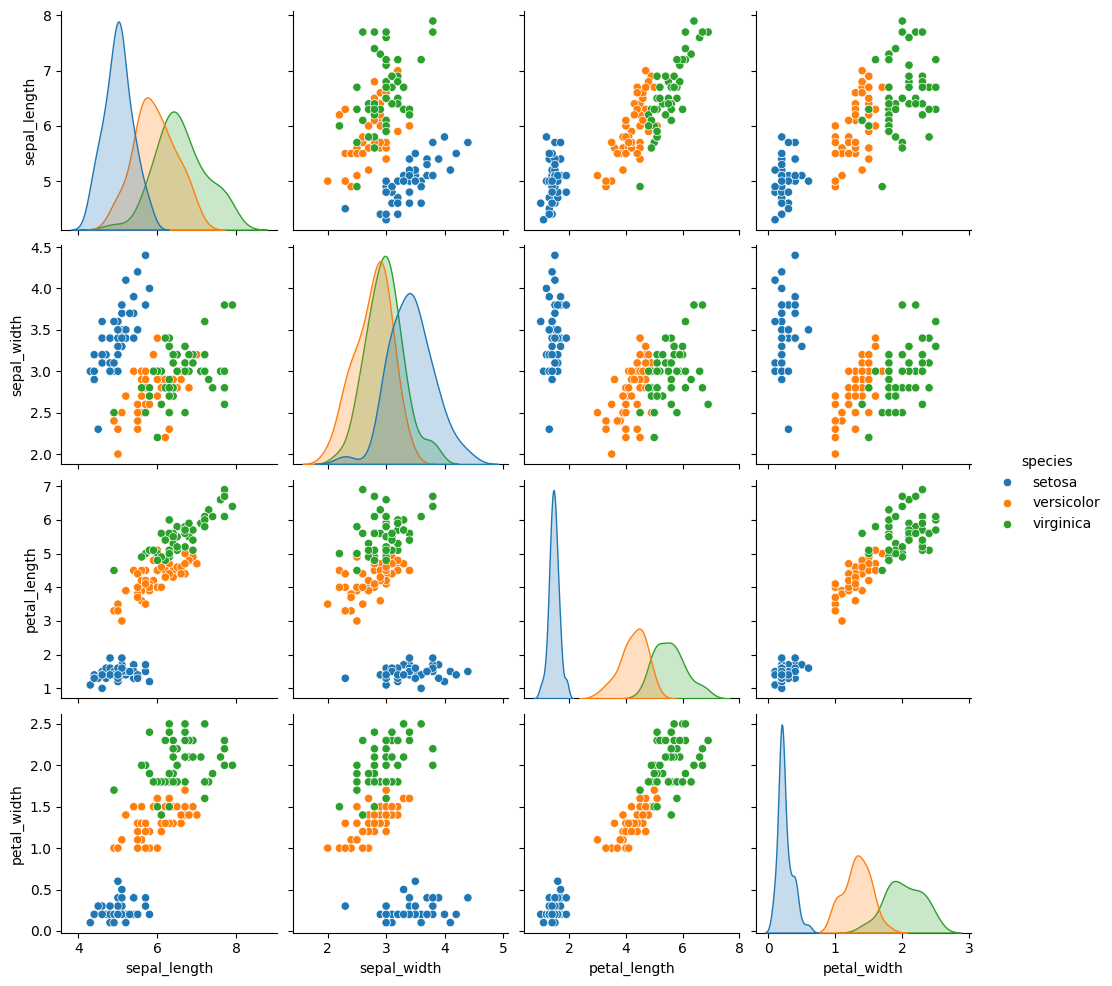

In [19]:
sns.pairplot(df, hue='species')

clear clustering for setosa

### Preprossessing and Model 


In [20]:
x= df[df.columns[:-1]]
y = df[df.columns[-1]]

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=20, test_size=.25)

In [22]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((112, 4), (112,), (38, 4), (38,))

In [23]:
# fit the model
dt = DecisionTreeClassifier(criterion='entropy')

In [24]:
model =dt.fit(xtrain, ytrain)

In [25]:
model.score(xtrain, ytrain)

1.0

In [26]:
model.score(xtest, ytest)

0.9210526315789473

[Text(0.375, 0.9, 'petal_length <= 2.6\nentropy = 1.584\nsamples = 112\nvalue = [38, 36, 38]'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.3125, 0.8, 'True  '),
 Text(0.5, 0.7, 'petal_width <= 1.75\nentropy = 0.999\nsamples = 74\nvalue = [0, 36, 38]'),
 Text(0.4375, 0.8, '  False'),
 Text(0.25, 0.5, 'petal_length <= 5.35\nentropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.5, 'petal_length <= 4.85\nentropy = 0.176\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.625, 0.3, 'sepal_length <= 5.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

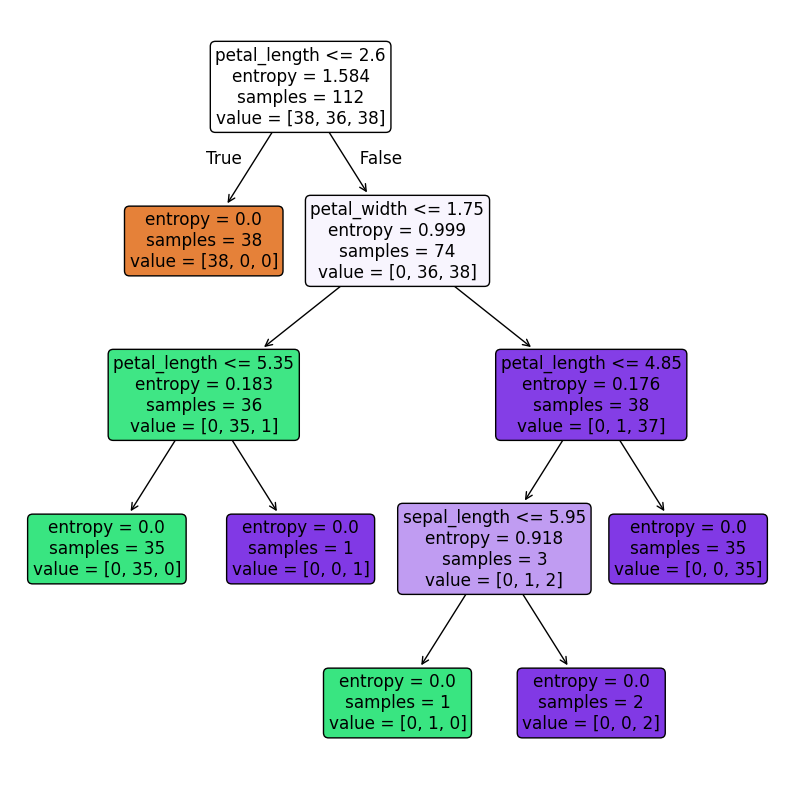

In [27]:
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled=True, rounded=True, feature_names=x.columns.to_list())

### post pruning

In [52]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [55]:
ccp_alphas

array([0.        , 0.00869361, 0.01736111, 0.2953675 , 0.33633825])

In [53]:
ccp_alphas[:-1]

array([0.        , 0.00869361, 0.01736111, 0.2953675 ])

In [30]:
impurities

array([0.        , 0.01738722, 0.03474833, 0.33011583, 0.66645408])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

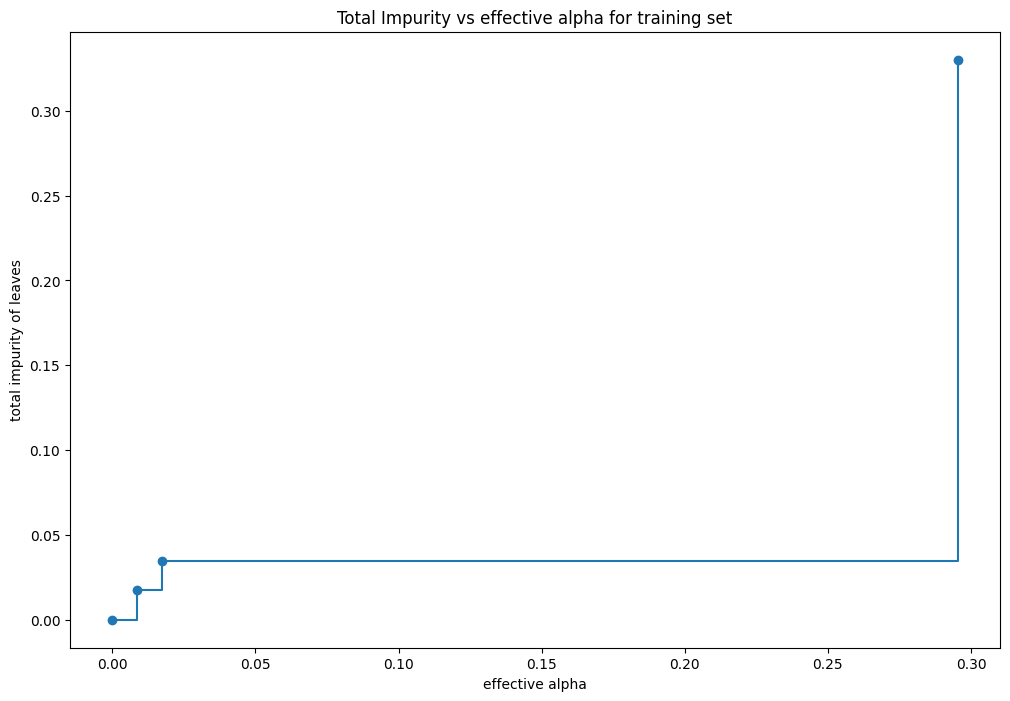

In [31]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title("Total Impurity vs effective alpha for training set")

In [51]:
## train a decision tree using the effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(xtrain, ytrain)
    clfs.append(clf)


print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
clfs[0]

Number of nodes in the last tree is: 3 with ccp_alpha: 0.29536750095960623


DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=0)

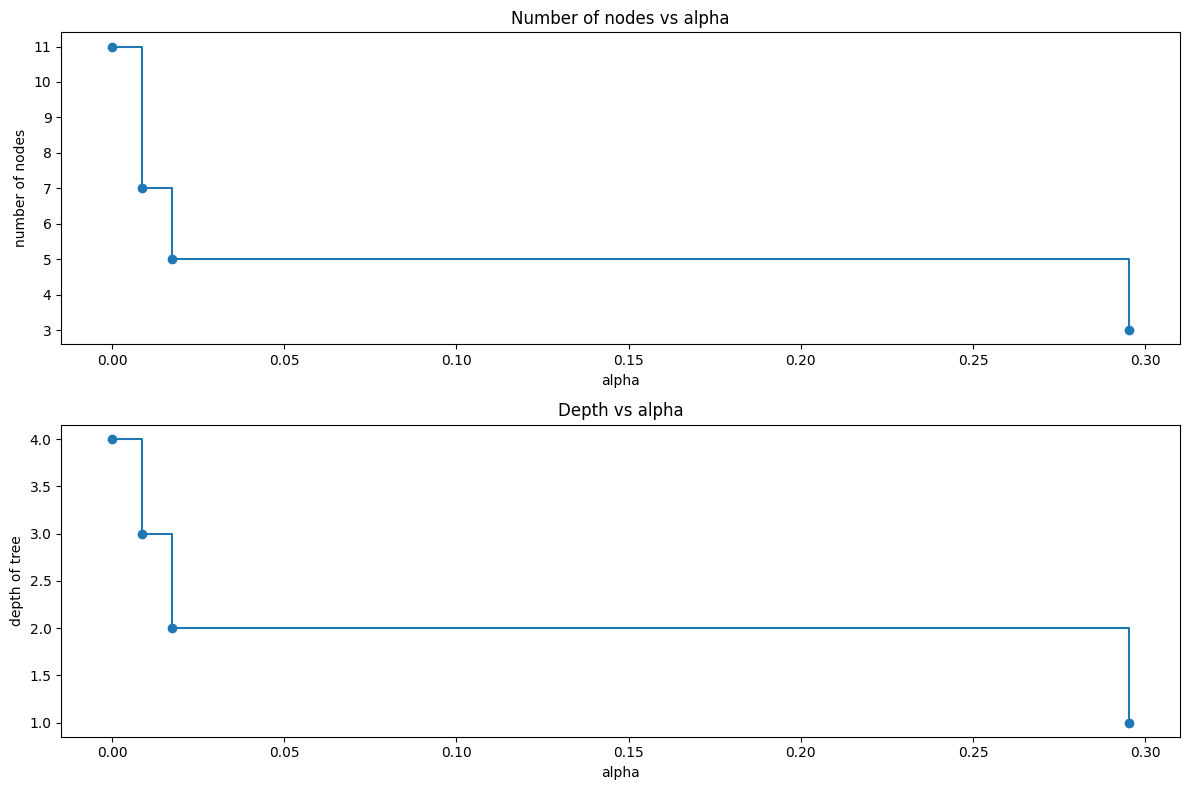

In [37]:
# in the
# clfs = clfs[:-1]
# ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
# print("Length of clfs:", len(clfs))
# print("Length of ccp_alphas:", len(ccp_alphas))
# print("Node counts:", node_counts)
# print("Depth:", depth)

node_count = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax =plt.subplots(2,1)
ax[0].plot(ccp_alphas, node_count, marker='o', drawstyle = 'steps-post') 
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
plt.tight_layout()



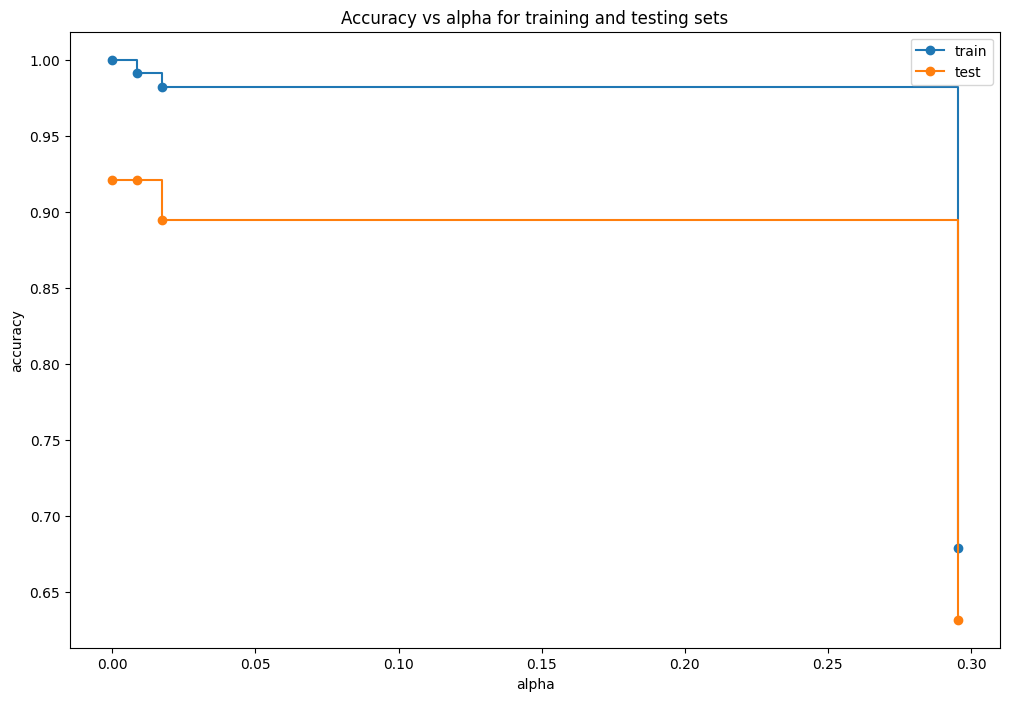

In [46]:
# Accuracy vs alpha for training and testing sets

train_scores = [clf.score(xtrain, ytrain) for clf in clfs]
test_scores = [clf.score(xtest, ytest) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [63]:
## grid search for best output
from sklearn.model_selection import GridSearchCV
parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'],
    'ccp_alpha': [0, 0.00869361, 0.01736111, 0.2953675 , 0.33633825]
}
cv = GridSearchCV(clf, param_grid=parameter, cv =5)
cv.fit(xtrain, ytrain)
cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=2,
                       max_features='sqrt', random_state=42)

In [73]:
clf = DecisionTreeClassifier(ccp_alpha=0,criterion='entropy', random_state=42)
model2 = clf.fit(xtrain, ytrain)

In [72]:
model2.score(xtest, ytest)

0.9210526315789473

### picke

In [74]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [78]:
sel_len = float(6.5)
sel_wid = float(7.8)
pel_len = float(5.7)
pel_wid = float(6.9)

fea= np.array([[sel_len,sel_wid,pel_len,pel_wid]])
print(fea)
model.predict(fea)

[[6.5 7.8 5.7 6.9]]


array(['virginica'], dtype=object)